# Train OCR text Detector quick example

For train datasets please download last version of ocr datasets [https://nomeroff.net.ua/datasets/](https://nomeroff.net.ua/datasets/). Unpack archive and rename to **./datasets/ocr** .
For examle
```bash
cd ./datasets/ocr
wget https://nomeroff.net.ua/datasets/autoriaNumberplateOcrBy-2020-10-09.zip
unzip autoriaNumberplateOcrBy-2020-10-09.zip
mv autoriaNumberplateOcrBy-2020-10-09 by
```
or use your own dataset.

In [1]:
# Specify device
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

In [2]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession

# config = ConfigProto()
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

In [3]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../')

DATASET_NAME = "kg"
VERSION = "2020_12_17_tensorflow_v2.3"
PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "datasets/ocr/", DATASET_NAME)
RESULT_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, "models/", 'anpr_ocr_{}_{}.h5'.format(DATASET_NAME, VERSION))

sys.path.append(NOMEROFF_NET_DIR)

from NomeroffNet.Base import OCR

In [4]:
class kg(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", 
                        "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
        
        self.EPOCHS = 2

GET ALPHABET
Max plate length in "val": 8
Max plate length in "train": 8
Max plate length in "test": 8
Letters train  {'N', 'C', '4', 'T', 'S', 'G', 'F', '7', 'X', 'O', 'J', 'U', 'L', '3', 'Q', 'K', 'A', 'D', 'E', 'W', 'R', 'I', 'V', '2', '0', 'P', 'B', '5', 'Z', '8', '6', 'Y', '9', 'H', '1', 'M'}
Letters val  {'N', 'C', '4', 'S', 'T', 'G', 'F', '7', 'X', 'O', 'J', 'U', 'L', '3', 'Q', 'K', 'A', 'D', 'E', 'W', 'R', 'I', 'V', '2', '0', 'P', 'B', '5', 'Z', '8', '6', 'Y', '9', 'H', '1', 'M'}
Letters test  {'N', 'C', 'T', '4', 'S', 'G', 'F', '7', 'X', 'J', 'O', 'U', 'Q', '3', 'L', 'K', 'A', 'D', 'E', 'W', 'R', 'I', 'V', '2', '0', 'P', 'B', '5', 'Z', '8', '6', ' ', 'Y', '9', 'H', '1', 'M'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) the_input (image)


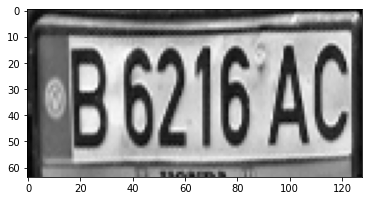

2) the_labels (plate number): B6216AC is encoded as [11, 6, 2, 1, 6, 10, 12, 37]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 7
START BUILD DATA
DATA PREPARED


In [5]:
ocrTextDetector = kg()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=False)

In [6]:
# A = {'M', 'P', 'X', 'I', 'T', 'C', '5', '3', '6', '0', '7', '2', '8', 'С', 'E', 'B', '1', 'H', 'O', 'K', 'A', '4', '9'}
# B = {'P', 'M', 'X', 'I', 'T', 'C', '5', '3', '6', '0', '7', '2', '8', 'E', 'B', '1', 'H', 'O', 'K', 'A', '4', '9'}
# A-B

In [7]:
model = ocrTextDetector.train()


START TRAINING
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_kg (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_kg[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 64, 32, 16)   2320        max1[0][0]                       
______________________________________________________________________________

In [8]:
ocrTextDetector.test(verbose=True)


RUN TEST

Predicted: 		 01123AX
True: 			 07123MAX

Predicted: 		 S4035AB
True: 			 S4095AB

Predicted: 		 B4725AF
True: 			 B4725AE

Predicted: 		 06843AAR
True: 			 06943AAR

Predicted: 		 08688ADM
True: 			 08688ADX

Predicted: 		 01475ABC
True: 			 08475ABF

Predicted: 		 0811AAT
True: 			 09811AAT

Predicted: 		 06751AA
True: 			 06751AAL

Predicted: 		 03003AC
True: 			 05003AC

Predicted: 		 S8571AK
True: 			 S3674AK

Predicted: 		 08594ACC
True: 			 08594ACG

Predicted: 		 B5648AU
True: 			 B5648AI

Predicted: 		 01630AAO
True: 			 01630AAV

Predicted: 		 3779B
True: 			 N3779B

Predicted: 		 50008AR
True: 			 S0008R

Predicted: 		 B9793AO
True: 			 B9793AQ

Predicted: 		 0849AO
True: 			 A849AUP

Predicted: 		 B4280AO
True: 			 B4280AQ

Predicted: 		 01984ACG
True: 			 01986ACQ

Predicted: 		 08885ABI
True: 			 08885ABZ

Predicted: 		 O0196D
True: 			 O0196O

Predicted: 		 I965SC
True: 			 496SK

Predicted: 		 N8315B
True: 			 N0315B

Predicted: 		 08429AAL
True: 			 08429AAE

In [9]:
ocrTextDetector.save(RESULT_MODEL_PATH, verbose=True)

SAVED TO /var/www/nomeroff-net/models/anpr_ocr_kg_2020_12_17_tensorflow_v2.3.h5


In [10]:
# Train with aug

GET ALPHABET
Max plate length in "val": 8
Max plate length in "train": 8
Max plate length in "test": 8
Letters train  {'0', 'B', 'A', '7', 'F', 'E', 'Y', 'I', '1', 'K', 'S', 'Z', 'U', 'C', 'G', 'W', 'X', '2', '8', '3', 'J', '5', 'D', 'H', 'T', 'V', 'N', 'P', '4', '6', 'Q', 'O', '9', 'L', 'M', 'R'}
Letters val  {'0', 'B', 'A', '7', 'F', 'Y', 'E', 'I', 'S', '1', 'K', 'Z', 'U', 'C', 'G', 'W', 'X', '2', '3', '8', 'J', '5', 'D', 'H', 'T', 'V', 'N', 'P', '4', '6', 'Q', 'O', '9', 'L', 'M', 'R'}
Letters test  {'0', 'B', 'A', '7', 'F', 'Y', 'E', 'I', '1', 'S', 'K', 'Z', 'U', ' ', 'C', 'G', 'W', 'X', '2', '8', '3', 'J', '5', 'D', 'H', 'T', 'V', 'N', 'P', '4', '6', 'Q', 'O', '9', 'L', 'M', 'R'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) the_input (image)


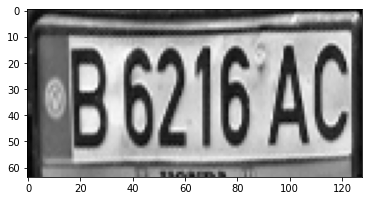

2) the_labels (plate number): B6216AC is encoded as [11, 6, 2, 1, 6, 10, 12, 37]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 7
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_kg (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_kg[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
_________________________________

Max plate length in "train": 8
Max plate length in "test": 8
Letters train  {'0', 'B', 'A', '7', 'F', 'E', 'Y', 'I', '1', 'K', 'S', 'Z', 'U', 'C', 'G', 'W', 'X', '2', '8', '3', 'J', '5', 'D', 'H', 'T', 'V', 'N', 'P', '4', '6', 'Q', 'O', '9', 'L', 'M', 'R'}
Letters val  {'0', 'B', 'A', '7', 'F', 'Y', 'E', 'I', 'S', '1', 'K', 'Z', 'U', 'C', 'G', 'W', 'X', '2', '3', '8', 'J', '5', 'D', 'H', 'T', 'V', 'N', 'P', '4', '6', 'Q', 'O', '9', 'L', 'M', 'R'}
Letters test  {'0', 'B', 'A', '7', 'F', 'Y', 'E', 'I', '1', 'S', 'K', 'Z', 'U', ' ', 'C', 'G', 'W', 'X', '2', '8', '3', 'J', '5', 'D', 'H', 'T', 'V', 'N', 'P', '4', '6', 'Q', 'O', '9', 'L', 'M', 'R'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) the_input (image)


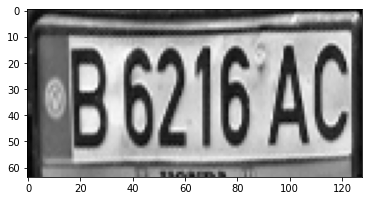

2) the_labels (plate number): B6216AC is encoded as [11, 6, 2, 1, 6, 10, 12, 37]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 7
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_kg (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_kg[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
________________________________

Max plate length in "train": 8
Max plate length in "test": 8
Letters train  {'0', 'B', 'A', '7', 'F', 'E', 'Y', 'I', '1', 'K', 'S', 'Z', 'U', 'C', 'G', 'W', 'X', '2', '8', '3', 'J', '5', 'D', 'H', 'T', 'V', 'N', 'P', '4', '6', 'Q', 'O', '9', 'L', 'M', 'R'}
Letters val  {'0', 'B', 'A', '7', 'F', 'Y', 'E', 'I', 'S', '1', 'K', 'Z', 'U', 'C', 'G', 'W', 'X', '2', '3', '8', 'J', '5', 'D', 'H', 'T', 'V', 'N', 'P', '4', '6', 'Q', 'O', '9', 'L', 'M', 'R'}
Letters test  {'0', 'B', 'A', '7', 'F', 'Y', 'E', 'I', '1', 'S', 'K', 'Z', 'U', ' ', 'C', 'G', 'W', 'X', '2', '8', '3', 'J', '5', 'D', 'H', 'T', 'V', 'N', 'P', '4', '6', 'Q', 'O', '9', 'L', 'M', 'R'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) the_input (image)


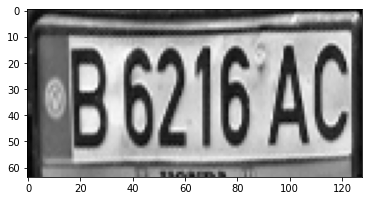

2) the_labels (plate number): B6216AC is encoded as [11, 6, 2, 1, 6, 10, 12, 37]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 7
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_kg (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_kg[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
________________________________

Max plate length in "train": 8
Max plate length in "test": 8
Letters train  {'0', 'B', 'A', '7', 'F', 'E', 'Y', 'I', '1', 'K', 'S', 'Z', 'U', 'C', 'G', 'W', 'X', '2', '8', '3', 'J', '5', 'D', 'H', 'T', 'V', 'N', 'P', '4', '6', 'Q', 'O', '9', 'L', 'M', 'R'}
Letters val  {'0', 'B', 'A', '7', 'F', 'Y', 'E', 'I', 'S', '1', 'K', 'Z', 'U', 'C', 'G', 'W', 'X', '2', '3', '8', 'J', '5', 'D', 'H', 'T', 'V', 'N', 'P', '4', '6', 'Q', 'O', '9', 'L', 'M', 'R'}
Letters test  {'0', 'B', 'A', '7', 'F', 'Y', 'E', 'I', '1', 'S', 'K', 'Z', 'U', ' ', 'C', 'G', 'W', 'X', '2', '8', '3', 'J', '5', 'D', 'H', 'T', 'V', 'N', 'P', '4', '6', 'Q', 'O', '9', 'L', 'M', 'R'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) the_input (image)


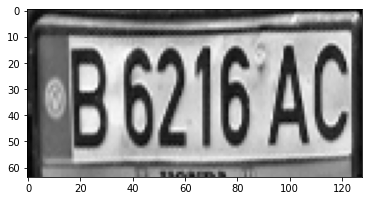

2) the_labels (plate number): B6216AC is encoded as [11, 6, 2, 1, 6, 10, 12, 37]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 7
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_kg (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_kg[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
________________________________

KeyboardInterrupt: 

In [14]:
# Train with aug
for i in range(7):
    ocrTextDetector = kg()
    ocrTextDetector.EPOCHS = 2

    model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=True)

    model = ocrTextDetector.train(load_last_weights=True)
    
    ocrTextDetector.test(verbose=True)

    ocrTextDetector.save(os.path.join(NOMEROFF_NET_DIR, "models/", 'anpr_ocr_{}_{}_{}.h5'.format(DATASET_NAME, VERSION, i)), verbose=True)

In [10]:
ocrTextDetector.test(verbose=True)


RUN TEST

Predicted: 		 04323AAX
True: 			 07123MAX

Predicted: 		 S405AB
True: 			 S4095AB

Predicted: 		 086870ABE
True: 			 06870ABE

Predicted: 		 0487AAQ
True: 			 04487AAO

Predicted: 		 08475AADF
True: 			 08475ABF

Predicted: 		 01405AAH
True: 			 04405AAH

Predicted: 		 S364AK
True: 			 S3674AK

Predicted: 		 B5648AV
True: 			 B5648AI

Predicted: 		 B5535AA
True: 			 B5535A

Predicted: 		 S0008K
True: 			 S0008R

Predicted: 		 08016AC
True: 			 05016AC

Predicted: 		 A849AP
True: 			 A849AUP

Predicted: 		 01988ACQ
True: 			 01986ACQ

Predicted: 		 B3649I
True: 			 B3649J

Predicted: 		 0885ABI
True: 			 08885ABZ

Predicted: 		 48SC
True: 			 496SK

Predicted: 		 N8315B
True: 			 N0315B

Predicted: 		 0517AAJ
True: 			 02517AAJ

Predicted: 		 08063AEM
True: 			 06063AEM

Predicted: 		 0040A
True: 			 0040IA

Predicted: 		 06983ADG
True: 			 06983ADS

Predicted: 		 086739AAA
True: 			 08739AAA

Predicted: 		 08973AAE
True: 			 08173AAE

Predicted: 		 08810ABK
True: 			 08810AC

In [9]:
ocrTextDetector.save(RESULT_MODEL_PATH, verbose=True)

SAVED TO /var/www/nomeroff-net/models/anpr_ocr_kg_2020_12_16_tensorflow_v2.3.h5


In [6]:
ocrTextDetector.load(RESULT_MODEL_PATH, verbose=False)

In [13]:
ocrTextDetector.load('/var/www/nomeroff-net/models/anpr_ocr_kg_2020_12_16_tensorflow_v2.3.h5', verbose=False)

In [8]:
from tensorflow.python.compiler.tensorrt import trt_convert as trt
converter = trt.TrtGraphConverterV2(input_saved_model_dir=RESULT_MODEL_PATH)
converter.convert()
converter.save(output_saved_model_dir)

INFO:tensorflow:Linked TensorRT version: (7, 2, 0)
INFO:tensorflow:Loaded TensorRT version: (7, 2, 0)


OSError: SavedModel file does not exist at: /home/www/nomeroff-net/models/anpr_ocr_ru_2020_10_07_tensorflow_v2.3.h5/{saved_model.pbtxt|saved_model.pb}

In [8]:
converter.convert()

OSError: SavedModel file does not exist at: /var/www/nomeroff-net/models/anpr_ocr_ru_2020_09_08_tensorflow_v2.2.h5/{saved_model.pbtxt|saved_model.pb}

In [9]:
from NomeroffNet.Base import convert_keras_to_freeze_pb

ImportError: cannot import name 'convert_keras_to_freeze_pb'

In [13]:
RESULT_MODEL_PATH1 = '/var/www/nomeroff-net/models/anpr_ocr_ru_2020_09_09_tensorflow_v2'
RESULT_MODEL_PATH_TRT = '/var/www/nomeroff-net/models/anpr_ocr_ru_2020_09_09_tensorflow_v2_trt'

In [12]:
#ocrTextDetector.save(RESULT_MODEL_PATH1, verbose=True)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /var/www/nomeroff-net/models/anpr_ocr_ru_2020_09_09_tensorflow_v2/assets
SAVED TO /var/www/nomeroff-net/models/anpr_ocr_ru_2020_09_09_tensorflow_v2


In [14]:
from tensorflow.python.compiler.tensorrt import trt_convert as trt
converter = trt.TrtGraphConverterV2(input_saved_model_dir=RESULT_MODEL_PATH1)
converter.convert()
converter.save(RESULT_MODEL_PATH_TRT)

INFO:tensorflow:Linked TensorRT version: (7, 1, 3)
INFO:tensorflow:Loaded TensorRT version: (7, 1, 3)
INFO:tensorflow:Could not find TRTEngineOp_0_0 in TF-TRT cache. This can happen if build() is not called, which means TensorRT engines will be built and cached at runtime.
INFO:tensorflow:Could not find TRTEngineOp_0_1 in TF-TRT cache. This can happen if build() is not called, which means TensorRT engines will be built and cached at runtime.
INFO:tensorflow:Could not find TRTEngineOp_0_4 in TF-TRT cache. This can happen if build() is not called, which means TensorRT engines will be built and cached at runtime.
INFO:tensorflow:Could not find TRTEngineOp_0_3 in TF-TRT cache. This can happen if build() is not called, which means TensorRT engines will be built and cached at runtime.
INFO:tensorflow:Could not find TRTEngineOp_0_5 in TF-TRT cache. This can happen if build() is not called, which means TensorRT engines will be built and cached at runtime.
INFO:tensorflow:Could not find TRTEngi